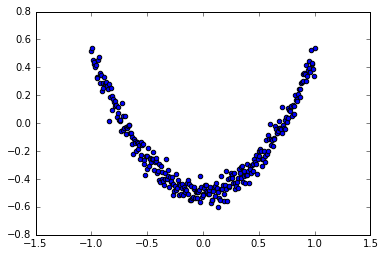

In [ ]:
import theano
import numpy as np
import theano.tensor as T
import matplotlib.pyplot as plt

class Layer(object):
    def __init__(self,inputs,in_size,out_size,activation_function=None):
        self.W = theano.shared(np.random.normal(0,1,(in_size,out_size)))
        self.b = theano.shared(np.zeros((out_size,)) + 0.1)
        self.Wx_plus_b = T.dot(inputs,self.W) + self.b
        self.activation_function = activation_function
        if activation_function is None:
            self.outputs = self.Wx_plus_b
        else:
            self.outputs = self.activation_function(self.Wx_plus_b)
"""
l1 = Layer(inputs,in_size=1,out_size=10,activation_funcction)
l2 = Layer(l1.output,10,2,None)
"""

#制作 假数据
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
#显示 假数据
# plt.scatter(x_data,y_data)
# plt.show()

 
#定义输入 类型
x = T.dmatrix('x')
y = T.dmatrix('y')

#添加层
l1 = Layer(x,1,10,T.nnet.relu)
l2 = Layer(l1.outputs,10,1,None)
#损失
cost = T.mean(T.square(l2.outputs - y))
#计算梯度
gW1,gb1,gW2,gb2 = T.grad(cost,[l1.W,l1.b,l2.W,l2.b])
#开始下降
learning_rate = 0.05
train = theano.function(
        inputs=[x,y],
        outputs = cost,
        updates = [(l1.W,l1.W-learning_rate*gW1),
                  (l1.b,l1.b-learning_rate*gb1),
                  (l2.W,l2.W-learning_rate*gW2),
                  (l2.b,l2.b-learning_rate*gb2)]
            )
#prediction
predict = theano.function(inputs = [x],outputs = l2.outputs)

#plot 假数据
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()                                  #red line
plt.show()

for i in range(1000):
    #training
    err = train(x_data,y_data)
    if i%50 == 0:
        #看到拟合程度与结果
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        predicted_value = predict(x_data)
        #将预测值放入plot中
        lines = ax.plot(x_data,predicted_value,'-r',lw=5)
        plt.pause(1)




